## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

### Dataset Loading

In [65]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

### Dataset First View

In [66]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Dataset Rows & Columns count

In [67]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

### Dataset Information

In [68]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Duplicate Values

In [69]:
insurance_dataset.duplicated().sum()

1

In [70]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

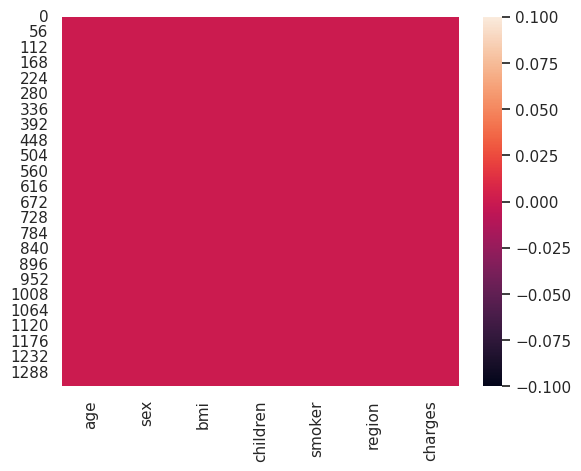

In [71]:
# Visualizing the missing values
sns.heatmap(insurance_dataset.isnull())
plt.show()

### What did you know about your dataset?

This is the dataset about Medical Insurance contains 1338 rows and 7 columns.

No null and missing values are found except one duplicate.

There are there categorical features (i.e smoker,sex,region).


## ***2. Understanding Your Variables***

In [72]:
#Dataset Columns
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [73]:
# Dataset describe
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Variables Description

**age** - age of primary beneficiary

**sex** - female, male

**bmi** -  Body mass index,using the ratio of height to weight, ideally 18.5 to 24.9

**Children** -  Number of children covered by health insurance / Number of dependents

**smoker** - smoking or not

**Region** - the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**Charges** - Individual medical costs billed by health insurance

### Check Unique Values for each variable.

In [74]:
# Check Unique Values for each variable.
print(insurance_dataset.nunique())
print("-"*50)
for i in insurance_dataset.columns:
  print(i,insurance_dataset[i].unique())
  print("-"*50)

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64
--------------------------------------------------
age [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
--------------------------------------------------
sex ['female' 'male']
--------------------------------------------------
bmi [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.8

In [75]:
# Checking datatypes
insurance_dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

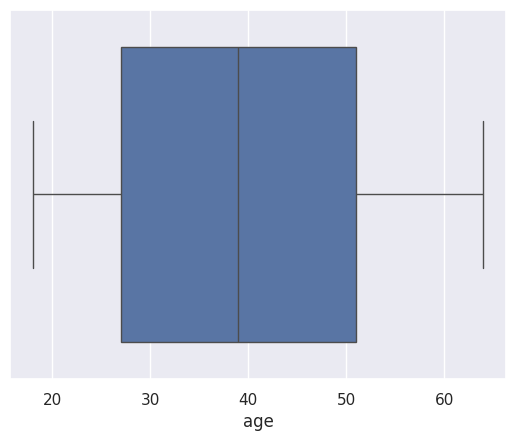

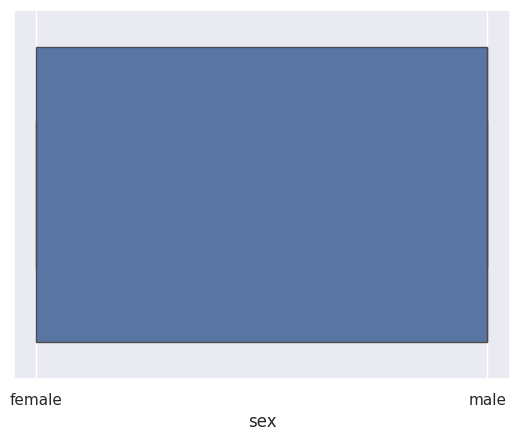

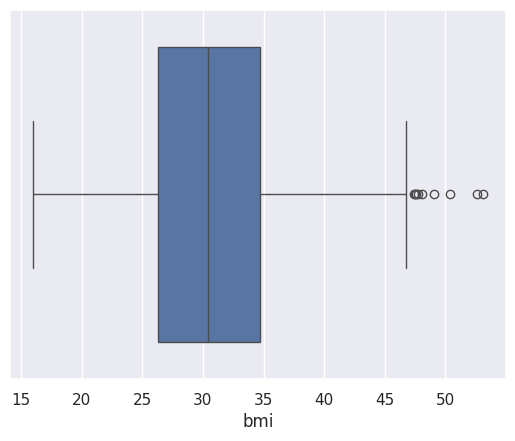

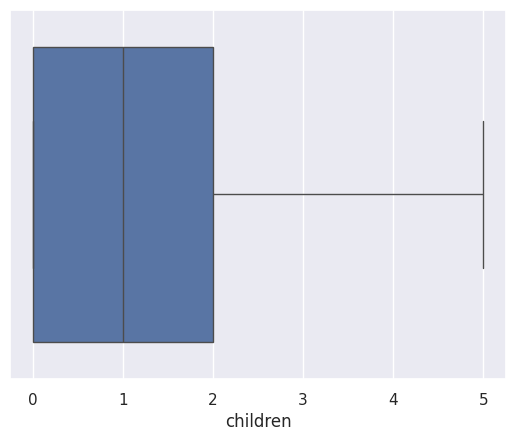

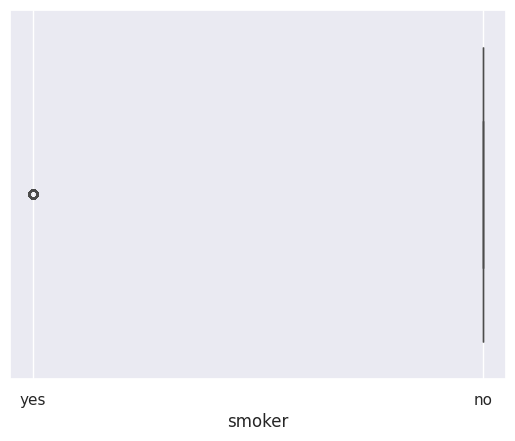

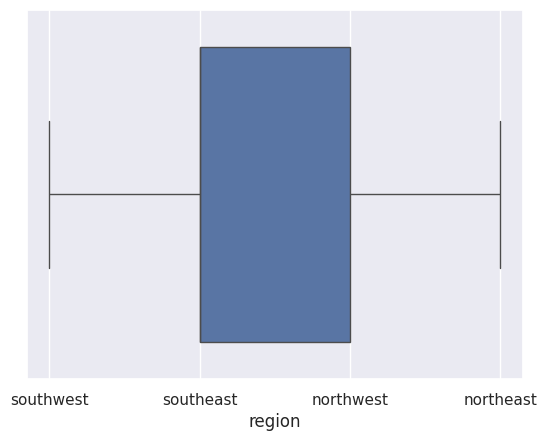

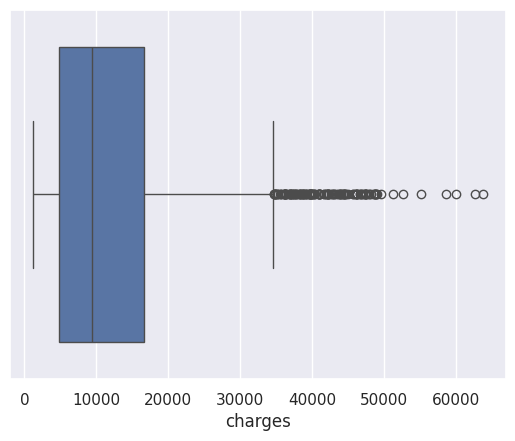

In [76]:
# checking for outliers
for i in insurance_dataset.columns:
  sns.boxplot(x=insurance_dataset[i])
  plt.show()

## ***3. Data Vizualization***

<ipython-input-77-7862b568dc61>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


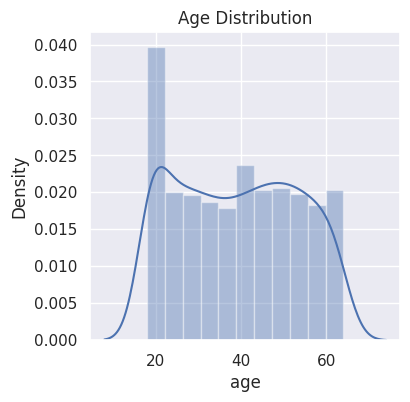

In [77]:
# distribution of age value
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

<ipython-input-78-2f27b5c9a997>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset,palette=['pink',"skyblue"])


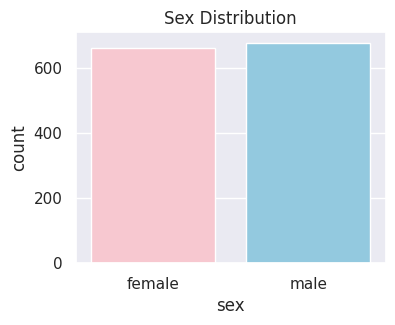

In [78]:
# Gender column
plt.figure(figsize=(4,3))
sns.countplot(x='sex', data=insurance_dataset,palette=['pink',"skyblue"])
plt.title('Sex Distribution')
plt.show()

In [79]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-80-e6fdda0accb9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


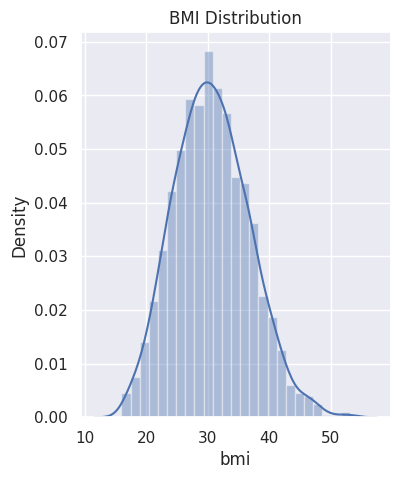

In [80]:
# bmi distribution
plt.figure(figsize=(4,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

<ipython-input-81-292d0d1a9caa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_dataset,palette=["yellow","orange","lightgreen","red","purple","brown"])


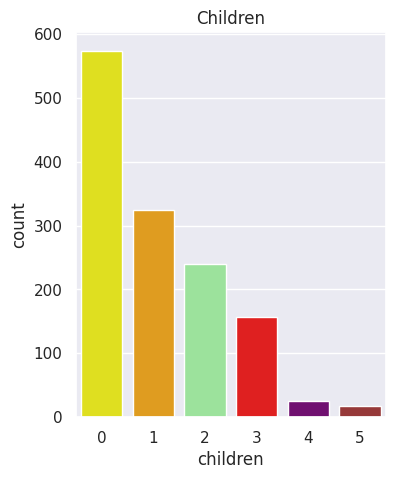

In [81]:
# children column
plt.figure(figsize=(4,5))
sns.countplot(x='children', data=insurance_dataset,palette=["yellow","orange","lightgreen","red","purple","brown"])
plt.title('Children')
plt.show()

In [82]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<ipython-input-83-9e15cdee6beb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset,palette=["brown","orange"])


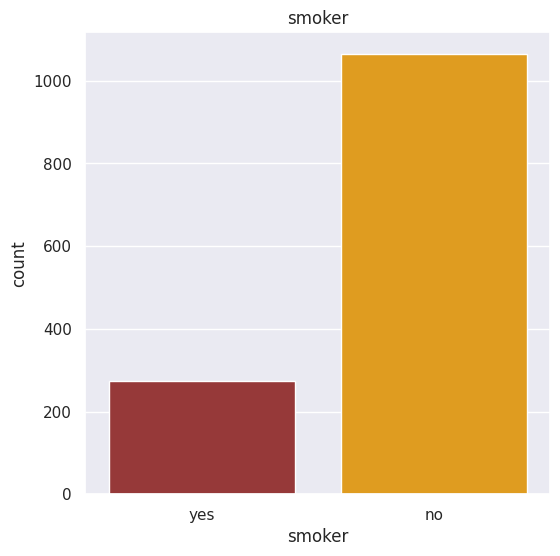

In [83]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset,palette=["brown","orange"])
plt.title('smoker')
plt.show()

In [84]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<ipython-input-85-2473d5e39b50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_dataset,palette=["yellow","brown","orange","red"])


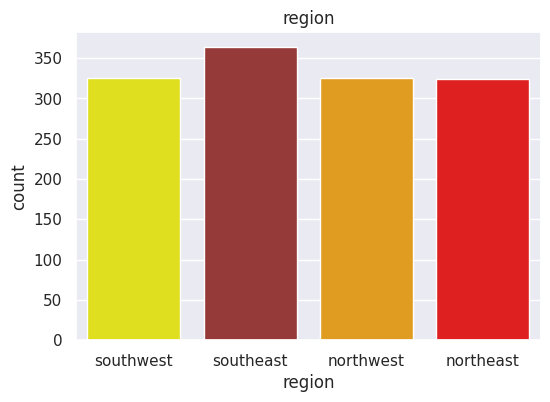

In [85]:
# region column
plt.figure(figsize=(6,4))
sns.countplot(x='region', data=insurance_dataset,palette=["yellow","brown","orange","red"])
plt.title('region')
plt.show()

In [86]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-87-a2fe9b394a51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


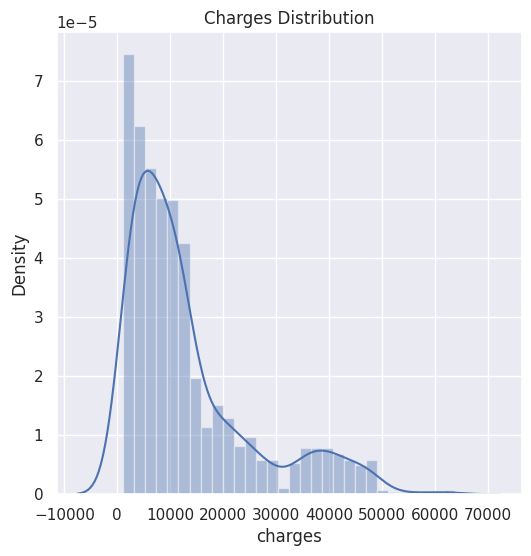

In [87]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

## ***4. Feature Engineering & Data Pre-processing***

###  Categorical Encoding





In [88]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [106]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


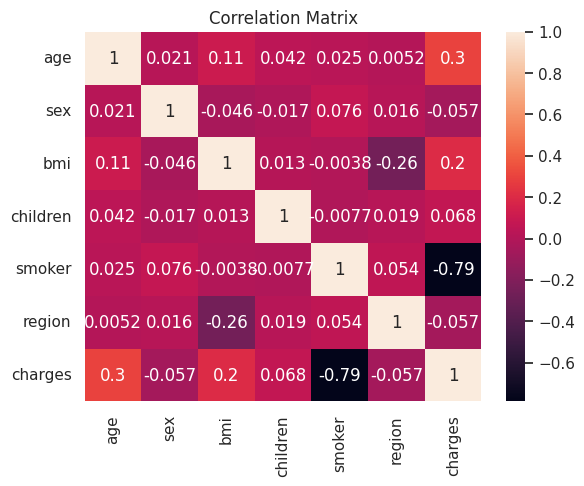

In [109]:
sns.heatmap(insurance_dataset.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

###  Data Splitting

In [89]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [90]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [91]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [92]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [93]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [94]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1338,) (1070,) (268,)


## ***5. ML Model Implementation***

###Linear Regression

In [95]:
# loading the Linear Regression model
regressor = LinearRegression()

In [96]:
regressor.fit(X_train, Y_train)

LinearRegression()

## ***6. ML Model Evaluation***

In [97]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

###R squared method

In [98]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [99]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

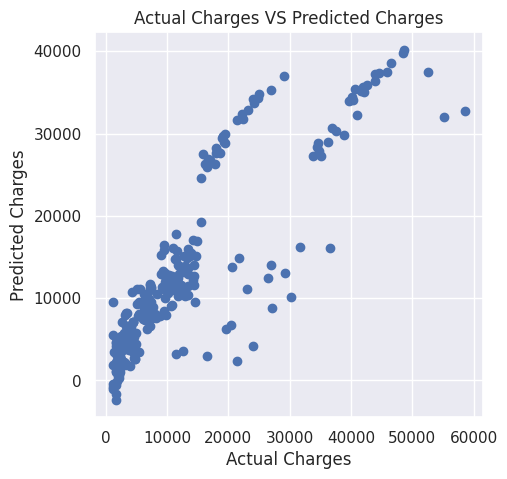

In [112]:
#Visualizing the actual and prediction charges
plt.figure(figsize=(5,5))
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual Charges VS Predicted Charges")
plt.show()

In [114]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684076


##Mean Squared Error

In [115]:
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
print('Mean Squared Error : ', mse_test)

Mean Squared Error :  38337035.48643885


##Model Score

In [118]:
print("Model Score",regressor.score(X_test,Y_test)*100)

Model Score 74.47273869684075


##***7 . Building a Predictive System***


In [116]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [105]:
input_data= (22,1,28.82,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[2515.82530329]
The insurance cost is USD  2515.825303294432


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
